# In Class Activity - Spotify Database - SQL Practice

Instructor: Melissa Laurino</br>
Spring 2025</br>

Name: Justin Davis</br>
Date: 02/20/25
<br>
<br>

In [2]:
# Load necessary packages:
from sqlalchemy import create_engine, inspect, text # Database navigation
import sqlite3 # A second option for working with databases
import pandas as pd # Python data manilpulation

In [3]:
# Set working directory (If needed)
#import os
#os.chdir('')

In [ ]:
# Print the columns in the database:

In [3]:
# Create a SQLite database and engine
db_file = "spotify_data.db"
engine = create_engine(f"sqlite:///{db_file}")

In [4]:
# Inspect the database to list the fields
inspector = inspect(engine)
columns = inspector.get_columns("spotify_history")

# Print column names
print("Columns in spotify_history table:")
for col in columns:
    print(col["name"], "-", col["type"])

Columns in spotify_history table:
ts - TEXT
platform - TEXT
ms_played - BIGINT
conn_country - TEXT
ip_addr - TEXT
master_metadata_track_name - TEXT
master_metadata_album_artist_name - TEXT
master_metadata_album_album_name - TEXT
spotify_track_uri - TEXT
episode_name - FLOAT
episode_show_name - FLOAT
spotify_episode_uri - FLOAT
audiobook_title - FLOAT
audiobook_uri - FLOAT
audiobook_chapter_uri - FLOAT
audiobook_chapter_title - FLOAT
reason_start - TEXT
reason_end - TEXT
shuffle - BOOLEAN
skipped - BOOLEAN
offline - BOOLEAN
offline_timestamp - FLOAT
incognito_mode - BOOLEAN
year - BIGINT


For practice, there are not multiple tables in this database. There is only one table named spotify_history.

Metadata for this database can be found here: https://github.com/MelissaLaurino/SpotifyStreamingHistory

We can use COUNT( * ) to summarize and count occurrences in SQL. Use COUNT( * ) below:

Query 1: <br>
Find the top 30 artists listened to in the year 2024.

In [8]:
with engine.connect() as connection:  # Establish a connection
    query_artists = text("""SELECT master_metadata_album_artist_name AS artist, SUM(ms_played) / 60000 AS minutes_played
                       FROM spotify_history
                       WHERE year = 2024
                       GROUP BY artist
                       ORDER BY minutes_played DESC
                       LIMIT 30
                       """) 
    artists = pd.read_sql(query_artists, connection)  # Use pandas to execute the query and fetch results

artists

,artist,minutes_played
0,Miley Cyrus,1307
1,Hozier,1159
2,Ariana Grande,840
3,Eminem,776
4,Lady Gaga,709
5,Sabrina Carpenter,706
6,Noah Kahan,623
7,Teddy Swims,483
8,Billie Eilish,477
9,CIL,456


Query 2: <br>
Find the top 30 songs listened to in the year 2017.

In [13]:
with engine.connect() as connection:  # Establish a connection
    query_track = text("""SELECT master_metadata_track_name AS song, SUM(ms_played) / 60000 AS minutes_played
                       FROM spotify_history
                       WHERE year = 2017
                       GROUP BY song
                       ORDER BY minutes_played DESC
                       LIMIT 30
                       """) 
    track = pd.read_sql(query_track, connection)  # Use pandas to execute the query and fetch results

track

,song,minutes_played
0,Malibu,677
1,Shape of You,489
2,It Ain’t Me (with Selena Gomez),414
3,Close,326
4,Havana (feat. Young Thug),277
5,Take Me Down,255
6,Anyway,227
7,Rockabye (feat. Sean Paul & Anne-Marie),216
8,Week Without You,215
9,Love Someone,201


Query 3: <br>
Ask a question and create your own! 

In [14]:
with engine.connect() as connection:  # Establish a connection
    query_track = text("""SELECT master_metadata_track_name, COUNT(*) AS play_count
                       FROM spotify_history
                       GROUP BY master_metadata_track_name
                       ORDER BY play_count DESC
                       LIMIT 30
                       """) 
    track = pd.read_sql(query_track, connection)  # Use pandas to execute the query and fetch results

track

,master_metadata_track_name,play_count
0,River,540
1,Malibu,521
2,All About That Bass,436
3,7 rings,392
4,Slide Away,390
5,When the Night is Over,387
6,Fade Into You,386
7,Down,381
8,Angels Like You,366
9,It Ain’t Me (with Selena Gomez),365


In [19]:
#Disconnect from the database. Always remember to disconnect :) 
connection.close()

# Assignment #5 - Data Gathering and Warehousing - DSSA-5102

<b>Only Murders in the...Database?</b><br>
An introduction to navigating SQL databases using R and Jupyter Notebook. <br>
<br>
Congrats! You have solved the murder from Assignment #4, let's practice more queries in SQL City! <br>
<br>
Your task for <b>Assignment #5</b> is to complete the following objectives:<br>
You are a data scientist that was hired by SQL City. Your objectives are as follows:<br>
- Objective 1: The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a ggplot2 bar graph visual to support your recommendation.<br>
- Objective 2: The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime? <br>
- Objective 3: To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?<br><br>
<b>--</b>Add detailed comments to explain EVERY query or SQL command you use while we are still learning and practicing. I have my steps outlined, but please add more cells inbetween for additional queries! There is no limit on the number of queries you can use. <br>
<b>--</b>For each query include comments such as "SELECT all records FROM table WHERE column name = X"<br>
<b>--</b>Answer the prompts in markdown cells. Justify your response. A simple yes/no answer will receive no credit.<br>

Recommended Readings: Chapters 4-7 in Getting Started with SQL by Thomas Nield<br><br>

SQL Dictionary: https://www.w3schools.com/sql/sql_ref_join.asp

This fabulous database was created by @NUKnightLab on Github and can be found here: https://github.com/NUKnightLab/sql-mysteries


In [66]:
# Load necessary libraries
from sqlalchemy import create_engine, inspect, text # Database navigation
import sqlite3 # A second option for working with databases
import pandas as pd # Python data manilpulation
import matplotlib.pyplot as plt #used for creating a bar plot

In [67]:
# Connect to our .db file
db_file = "sql-murder-mystery.db"
engine = create_engine(f"sqlite:///{db_file}") #using create_engine function for connecting to database 

In [68]:
# For a quick reference for tables and columns, refer to schema on Blackboard, or list the tables and fields below:
inspector = inspect(engine)

#getting list of table names
tables = inspector.get_table_names()

#loop through all table and column names
for table in tables:
    print(f"\nColumns in '{table}' table:")
 
    columns = inspector.get_columns(table)
    for col in columns:
        print(f" {col['name']} - {col['type']}")


Columns in 'crime_scene_report' table:
 date - INTEGER
 type - TEXT
 description - TEXT
 city - TEXT

Columns in 'drivers_license' table:
 id - INTEGER
 age - INTEGER
 height - INTEGER
 eye_color - TEXT
 hair_color - TEXT
 gender - TEXT
 plate_number - TEXT
 car_make - TEXT
 car_model - TEXT

Columns in 'facebook_event_checkin' table:
 person_id - INTEGER
 event_id - INTEGER
 event_name - TEXT
 date - INTEGER

Columns in 'get_fit_now_check_in' table:
 membership_id - TEXT
 check_in_date - INTEGER
 check_in_time - INTEGER
 check_out_time - INTEGER

Columns in 'get_fit_now_member' table:
 id - TEXT
 person_id - INTEGER
 name - TEXT
 membership_start_date - INTEGER
 membership_status - TEXT

Columns in 'income' table:
 ssn - INTEGER
 annual_income - INTEGER

Columns in 'interview' table:
 person_id - INTEGER
 transcript - TEXT

Columns in 'person' table:
 id - INTEGER
 name - TEXT
 license_id - INTEGER
 address_number - INTEGER
 address_street_name - TEXT
 ssn - INTEGER

Columns in 'solu

We can use the COUNT command to explore our queries further. COUNT will count the number of records that meet the specified criteria.
Additional examples using COUNT: https://www.w3schools.com/sql/sql_count.asp

In [31]:
#Practice analyzing COUNTS in data tables with SQL queries:
#Brainstorming for Objective 1
#We can find the top ten cities within our Murder Mystery database that had the most crimes by using the COUNT SQL command.
#SELECT the cities that have the most counts within the table crime_scene_report and
#GROUP the results BY city and ORDER BY a DESC count, only show a limit of 10 records:
#Query to find the top 10 cities with the most crimes
with engine.connect() as connection:  # Establish a connection
    query_cities = text("""SELECT city, COUNT(*) AS count
        FROM crime_scene_report
        GROUP BY city
        ORDER BY count DESC
        LIMIT 10
    """)  
    #selecting from the crime_scene_report
    #grouping by cities and the have the count go from greatest to least greatest 
    #limit results to 10 
    
    # Use pandas to execute the query and fetch results
    cities = pd.read_sql(query_cities, connection)

# Display the results
cities

#Looks like SQL City and Murfeesboro have the highest number of crimes! 

#Use COUNT(*) as count to determine the answers to the objectives below.

,city,count
0,SQL City,9
1,Murfreesboro,9
2,Toledo,8
3,Jersey City,8
4,Evansville,8
5,Duluth,8
6,Wilmington,7
7,Waterbury,7
8,Reno,7
9,Portsmouth,7


<b>Objective 1:</b> The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a bar graph visual to support your recommendation.

In [36]:
# Query to get the top 10 crime types in SQL City
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT type, COUNT(*) AS count
        FROM crime_scene_report 
        WHERE city = 'SQL City' 
        GROUP BY type
        ORDER BY count DESC
        LIMIT 10
    """)  #selecting from crime_scene_report
    #selecting from SQL City
    #grouping by type of crime
    #ordering by count in decending order and limiting to 10 results
    
    #Use pandas to execute the query and fetch results
    crime_data = pd.read_sql(query, connection)

# Display the results
print(crime_data)

      type  crime_count
0   murder            3
1  assault            2
2    theft            1
3  robbery            1
4  bribery            1
5    arson            1


In [39]:
print(f"Crime type that needs more training for officers in SQL City: {crime_data.loc[crime_data['crime_count'].idxmax(), 'type']}")
print(f"Most committed crimes in SQL City: {crime_data.iloc[0]['type']} with {crime_data.iloc[0]['crime_count']} occurrences and {crime_data.iloc[1]['type']} with {crime_data.iloc[1]['crime_count']} occurrences")

Crime type that needs more training for officers in SQL City: murder
Most committed crimes in SQL City: murder with 3 occurrences and assault with 2 occurrences


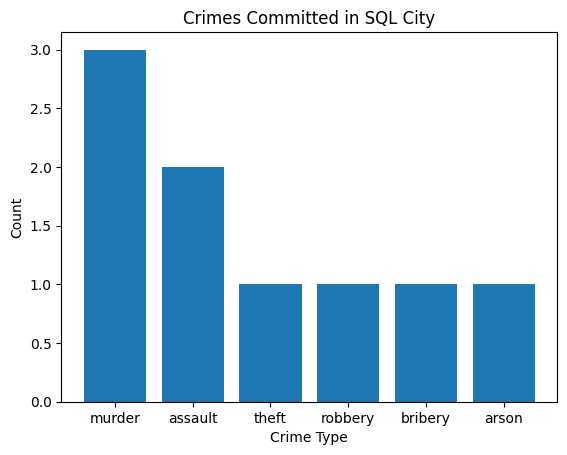

In [45]:
#Graph your results:
#plotting a bar chart
plt.bar(crime_data['type'], crime_data['crime_count'])

plt.xlabel('Crime Type') # x-axis label
plt.ylabel('Count') # y-axis label
plt.title('Crimes Committed in SQL City') # plot title

plt.show()

Answer: Murder and Assault are the leading crimes in SQL City.

<b>Objective 2:</b> The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime?

In [72]:
#Columns in 'crime_scene_report' table:
 #date - INTEGER
 #type - TEXT
 #description - TEXT
 #city - TEXT
#knowing the dates are formatted like YYYYMMDD from assignment 4
#SQL query to get the month with the highest crime rate
with engine.connect() as connection:
    query = text("""SELECT SUBSTR(date, 5, 2) AS month, COUNT(*) AS count
        FROM crime_scene_report
        WHERE city = 'SQL City'
        GROUP BY month
        ORDER BY count DESC
    """)
    #selecting from crime_scene_report
    #from SQL City
    #then group by the month (using a substring from the data column where 5 is the starting index, and 2 is the amount of 
    #characters being accounted for from the starting index
    #ordering by the count in descending order 
    highest_crime_month = pd.read_sql(query, connection)  # Save as DataFrame

highest_crime_month

,month,count
0,01,4
1,02,2
2,11,1
3,08,1
4,07,1


Answer: It seems like the month with the largest amount of crimes is January with a total of 4 crimes.

<b>Objective 3:</b> To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?

In [70]:
#Columns in 'get_fit_now_member' table:
 #id - TEXT
 #person_id - INTEGER
 #name - TEXT
 #membership_start_date - INTEGER
 #membership_status - TEXT
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT membership_status, COUNT(*) AS count
                    FROM get_fit_now_member
                    GROUP BY membership_status
                    ORDER BY count
                    """)  
    #selecting from the get_fit_now_member
    #grouping by the membership_status
    #and ordering it by the count of each membership 
    membership = pd.read_sql(query, connection) 
    

membership

,membership_status,count
0,regular,53
1,silver,63
2,gold,68


Answer: The regular membership is the membership that civilains own the least, so this should be the membership that the officers should recieve. 

In [ ]:
#Disconnect from the database. Always remember to disconnect :) 
connection.close()